In [3]:
!pip install -q -U tensorflow_addons

     |████████████████████████████████| 1.1 MB 5.4 MB/s 


# Imports

In [43]:
from tensorflow.keras import layers, Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import ZeroPadding2D, Conv2D, MaxPool2D, Normalization, Flatten, Dense, Resizing, Lambda
from tensorflow.nn import l2_normalize
from tensorflow.python.keras.utils.vis_utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras import backend as backend
import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import plotly.graph_objs as go

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Making dataset

In [13]:
os.chdir("/content/drive/My Drive/selected_classes (1)")
class_list = os.listdir()

In [14]:
image_list = []
labels_list = []
i = 0
for person in class_list:
  os.chdir("/content/drive/My Drive/selected_classes (1)/" + person)
  person_list = os.listdir()
  for person_image in person_list:
    image_list.append(cv2.imread("/content/drive/My Drive/selected_classes (1)/" + person + "/" + person_image))
    labels_list.append(i)
  i = i + 1

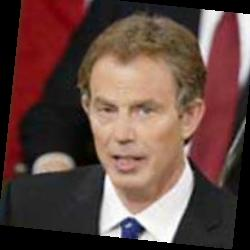

In [15]:
cv2_imshow(image_list[1])

In [20]:
image_list = np.array(image_list)
image_list = tf.convert_to_tensor(image_list, dtype = tf.float32)
labels_list = np.array(labels_list)
labels_list = tf.convert_to_tensor(labels_list, dtype = tf.float32)

In [21]:
image_list.shape

TensorShape([1560, 250, 250, 3])

In [22]:
labels_list.shape

TensorShape([1560])

In [23]:
print(labels_list)

tf.Tensor([ 0.  0.  0. ... 11. 11. 11.], shape=(1560,), dtype=float32)


# FaceNet Model

In [24]:
def euclidean_distance(x1, x2):
        squared_sum = backend.sum(backend.square(x1 - x2), axis = -1, keepdims = False)
        return squared_sum

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = [7, 7], strides = 2, padding = 'same', activation="relu"))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 64, kernel_size = [1, 1], strides = 1, padding = 'same', activation="relu"))
model.add(Conv2D(filters = 192, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model.add(Normalization())
model.add(MaxPool2D(pool_size = 2, padding = 'same'))
model.add(Conv2D(filters = 192, kernel_size = [1, 1], strides = 1, padding = 'same', activation="relu"))
model.add(Conv2D(filters = 384, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model.add(MaxPool2D(pool_size = 2))
model.add(Conv2D(filters = 384, kernel_size = [1, 1], strides = 1, padding = 'same', activation="relu"))
model.add(Conv2D(filters = 256, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model.add(Conv2D(filters = 256, kernel_size = [1, 1], strides = 1, padding = 'same', activation="relu"))
model.add(Conv2D(filters = 256, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model.add(Conv2D(filters = 256, kernel_size = [1, 1], strides = 1, padding = 'same', activation="relu"))
model.add(Conv2D(filters = 256, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model.add(MaxPool2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(units = 32 * 128))
model.add(Dense(units = 32 * 128))
model.add(Dense(units = 128))
model.add(Dense(12, activation = 'softmax'))
# model.add(Lambda(lambda x: backend.l2_normalize(x, axis=1)))

In [25]:
model.compile(
    optimizer = "adam",
    loss = tfa.losses.TripletSemiHardLoss(),
    metrics = [tfa.metrics.MultiLabelConfusionMatrix(num_classes = 12)]
)

In [26]:
model.fit(
    image_list,
    labels_list,
    epochs = 10
)

Epoch 1/10
49/49 [==============================] - 394s 8s/step - loss: 0.8092 - Multilabel_confusion_matrix: 701.3125
Epoch 2/10
49/49 [==============================] - 388s 8s/step - loss: 0.6262 - Multilabel_confusion_matrix: 700.7500
Epoch 3/10
49/49 [==============================] - 390s 8s/step - loss: 0.6616 - Multilabel_confusion_matrix: 700.7500
Epoch 4/10
49/49 [==============================] - 397s 8s/step - loss: 0.6605 - Multilabel_confusion_matrix: 700.7500
Epoch 5/10
49/49 [==============================] - 395s 8s/step - loss: 0.6512 - Multilabel_confusion_matrix: 700.7500
Epoch 6/10
49/49 [==============================] - 382s 8s/step - loss: 0.6332 - Multilabel_confusion_matrix: 700.7500
Epoch 7/10
49/49 [==============================] - 393s 8s/step - loss: 0.6693 - Multilabel_confusion_matrix: 700.7500
Epoch 8/10
49/49 [==============================] - 387s 8s/step - loss: 0.6728 - Multilabel_confusion_matrix: 700.7500
Epoch 9/10
49/49 [======================

In [ ]:
model.save()

In [44]:
epochs = np.arange(10) + 1
loss_list = [0.8092, 0.6262, 0.6616, 0.6605, 0.6512, 0.6332, 0.6693, 0.6728, 0.6635, 0.6737]

trace = go.Line(
    x = epochs,
    y = loss_list
)

layout = go.Layout(
    xaxis = dict(title = "no. of epochs"),
    yaxis = dict(title = "triplet loss"),
    title = f"alpha = {1}"
)

plot = go.Figure(
    data = [trace],
    layout = layout
)

plot.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [29]:
def compair(image1, image2, model):
  cv2_imshow(np.array(image1))
  cv2_imshow(np.array(image2))
  y1 = model.predict(tf.expand_dims(image1, axis = 0))
  y2 = model.predict(tf.expand_dims(image2, axis = 0))
  return euclidean_distance(np.array(y1), np.array(y2)) 

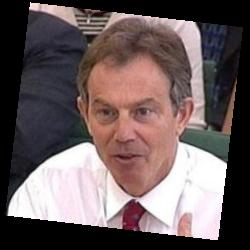

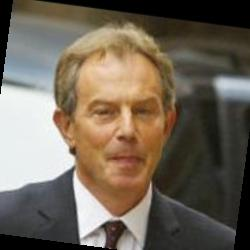

0.0


In [37]:
print(np.array(compair(image_list[0], image_list[10], model))[0])

In [39]:
def find_accuracy(images_list, model, n = 200):
  count = 0
  for m in range(n):
    i = random.randint(0, images_list.shape[0]-1)
    image1 = images_list[i]
    j = random.randint(0, images_list.shape[0]-1)
    image2 = images_list[j]
    if compair(image1, image2, model) == 0:
      count = count + 1
  return count/n

# VGG MODEL

In [ ]:
model_vgg = Sequential()
model_vgg.add(Conv2D(filters = 64, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model_vgg.add(Conv2D(filters = 64, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model_vgg.add(MaxPool2D(pool_size = 2))
model_vgg.add(Conv2D(filters = 128, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model_vgg.add(Conv2D(filters = 128, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model_vgg.add(MaxPool2D(pool_size = 2))
model_vgg.add(Conv2D(filters = 256, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model_vgg.add(Conv2D(filters = 256, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model_vgg.add(Conv2D(filters = 256, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model_vgg.add(MaxPool2D(pool_size = 2))
model_vgg.add(Conv2D(filters = 512, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model_vgg.add(Conv2D(filters = 512, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model_vgg.add(Conv2D(filters = 512, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
'''model_vgg.add(MaxPool2D(pool_size = 2))
model_vgg.add(Conv2D(filters = 512, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model_vgg.add(Conv2D(filters = 512, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))
model_vgg.add(Conv2D(filters = 512, kernel_size = [3, 3], strides = 1, padding = 'same', activation="relu"))'''
model_vgg.add(MaxPool2D(pool_size = 2))
model_vgg.add(Flatten())
model_vgg.add(Dense(units = 128, activation = 'relu'))
model_vgg.add(Dense(units = 128, activation = 'relu'))
model_vgg.add(Dense(units = 12, activation = 'softmax'))


In [ ]:
model_vgg.compile(
    optimizer="adam",
    loss=tfa.losses.TripletSemiHardLoss(),
    metrics=[tfa.metrics.MultiLabelConfusionMatrix(num_classes=12)]
)

In [ ]:
history_vgg = model_vgg.fit(
    image_list,
    labels_list,
    epochs=5
)